# 데이터 확인

In [1]:
# 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

설치 후 런타임 재시작 해줘야 폰트가 설정 됩니다.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus']=False

In [3]:
# 데이터 불러오기
import pandas as pd
sales_member_product = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project3,4/sales_member_product.csv',low_memory=False)
member_cpn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project3,4/member_cpn.csv',low_memory=False)

In [4]:
sales_member_product.drop('Unnamed: 0',axis=1,inplace=True)
member_cpn.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
member_cpn

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,총구매금액,총구매횟수
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,1,1,1,0.0,0.0,77000,2
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,1,1,1,1.0,1.0,5610,1
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,1,1,1,2.0,2.0,119040,2
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,1,0,0,3.0,3.0,151920,2
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,1,1,1,4.0,4.0,27920,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81089,201912291058164,여,기혼,경기,31.0,국민은행,오픈마켓,Yes,1,1,1,5.0,6.0,97800,2
81090,201912291058167,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes,1,1,1,3.0,6.0,237000,3
81091,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,1,1,1,6.0,1.0,211940,4
81092,201912291058169,여,기혼,경기,32.0,새마을금고,인스타그램,Yes,1,1,1,5.0,0.0,51000,1


# 클러스터링

## 차원 축소

In [6]:
sub = member_cpn[['연령','성별_num','자녀여부_num','결혼유무_num','거주지역_num','유입경로_num','총구매금액','총구매횟수']].copy()
sub.dropna(inplace=True)
sub

,연령,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,총구매금액,총구매횟수
0,37.0,1,1,1,0.0,0.0,77000,2
1,33.0,1,1,1,1.0,1.0,5610,1
2,32.0,1,1,1,2.0,2.0,119040,2
3,34.0,1,0,0,3.0,3.0,151920,2
4,32.0,1,1,1,4.0,4.0,27920,1
...,...,...,...,...,...,...,...,...
81089,31.0,1,1,1,5.0,6.0,97800,2
81090,37.0,1,1,1,3.0,6.0,237000,3
81091,26.0,1,1,1,6.0,1.0,211940,4
81092,32.0,1,1,1,5.0,0.0,51000,1


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(sub)
sub_sc = sc.transform(sub)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(sub_sc)
sub_pca = pca.transform(sub_sc)

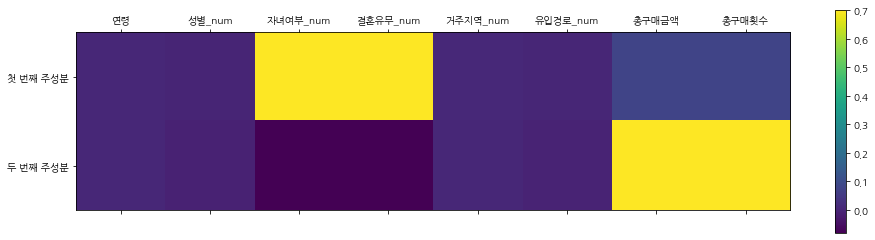

In [9]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],['첫 번째 주성분','두 번째 주성분'])
plt.colorbar()
plt.xticks(range(len(sub.columns)),sub.columns)
plt.show()

## k-means

In [10]:
# df 만들기
from sklearn.cluster import KMeans

km_col = ['comp1','comp2']
km_df = pd.DataFrame(sub_pca, columns=km_col)
km_df.dropna(inplace=True)

In [11]:

# sse=[]
# for i in range(1,10):
#     km =KMeans(n_clusters=i)
#     km.fit(sub_pca)
#     sse.append(km.inertia_)
# plt.plot(range(1,10),sse,'go-')
# plt.show()

In [12]:
# k-means
km = KMeans(n_clusters=3, init='random',max_iter=100, random_state=0)
km.fit(sub_pca)
label_km = km.labels_
label_km

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [13]:
# 컬럼추가
km_df['label']=label_km
km_df

,comp1,comp2,label
0,0.619842,-0.228261,2
1,0.551945,-0.777158,2
2,0.636255,-0.044893,2
3,-3.054764,0.531635,0
4,0.573138,-0.675196,2
...,...,...,...
81089,0.636057,-0.144110,2
81090,0.742679,0.717337,2
81091,0.727133,0.803405,2
81092,0.583442,-0.562438,2


In [14]:
km_df.dropna(inplace=True)
len(km_df)

81094

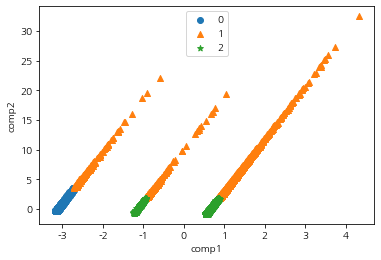

In [15]:
# 시각화
markers=['o','^','*']
for i,m in enumerate(markers):
    df_i = km_df[km_df['label']==i]
    x1 = df_i['comp1']
    x2 = df_i['comp2']
    plt.scatter(x1,x2,marker=m, label=i)
plt.legend(loc='upper center')
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()

## dbscan

In [16]:
len(sub_pca)

81094

In [95]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.1,min_samples=100)
db.fit(sub_pca)
label_db = db.labels_
label_db

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
# df 만들기
db_col = ['comp1','comp2']
db_df = pd.DataFrame(sub_pca, columns=db_col)
db_df['label']=label_db
db_df.dropna(inplace=True)
len(db_df)

81094

In [97]:
db_df['label'].unique()

array([ 0,  1, -1,  2])

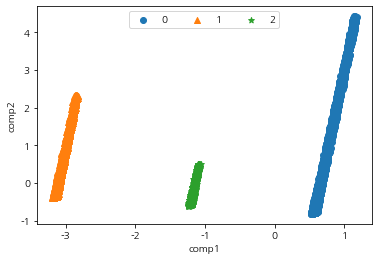

In [99]:
# 시각화
markers=['o','^','*']
for i,m in enumerate(markers):
    df_i = db_df[db_df['label']==i]
    x1 = df_i['comp1']
    x2 = df_i['comp2']
    plt.scatter(x1,x2,marker=m, label=i)
plt.legend(loc='upper center',ncol=4)
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()

## 그룹 확인

In [100]:
member_cpn['label']= db_df['label']

In [101]:
member_cpn['label'].unique()

array([ 0,  1, -1,  2])

In [102]:
len(member_cpn[member_cpn['label']== 0])

64281

In [103]:
len(member_cpn[member_cpn['label']== 1])

11756

In [104]:
len(member_cpn[member_cpn['label']== 2])

2604

In [105]:
len(member_cpn[member_cpn['label']== -1.0])

2453

In [118]:
# group 0
member_cpn_0 = member_cpn[member_cpn['label']== 0]
member_cpn_0['결혼유무_num'].unique()

array([1])

In [119]:
member_cpn_0['자녀여부_num'].unique()
# 0은 기혼 자녀

array([1])

In [120]:
# group 1
member_cpn_1 = member_cpn[member_cpn['label']== 1]

In [121]:
member_cpn_1['결혼유무_num'].unique()

array([0])

In [122]:
member_cpn_1['자녀여부_num'].unique()
# 1은 미혼 노자녀

array([0])

In [123]:
member_cpn_2 = member_cpn[member_cpn['label']== 2]

In [124]:
member_cpn_2['결혼유무_num'].unique()

array([1])

In [125]:
member_cpn_2['자녀여부_num'].unique()
# 2는 기혼 노자녀

array([0])

In [78]:
member_cpn_0.describe()

,ID,연령,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,총구매금액,총구매횟수,label
count,6.513700e+04,65137.000000,65137.000000,65137.0,65137.0,65137.000000,65137.000000,6.513700e+04,65137.000000,65137.0
mean,2.019058e+14,32.810676,0.969249,1.0,1.0,6.119778,1.708553,7.918357e+04,2.490750,0.0
std,4.879018e+09,2.948384,0.172642,0.0,0.0,3.493721,1.874244,1.291647e+05,2.772816,0.0
min,2.018123e+14,20.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000e+00,1.000000,0.0
25%,2.019030e+14,31.000000,1.000000,1.0,1.0,4.000000,0.000000,1.125000e+04,1.000000,0.0
50%,2.019053e+14,33.000000,1.000000,1.0,1.0,5.000000,2.000000,3.110000e+04,1.000000,0.0
75%,2.019091e+14,35.000000,1.000000,1.0,1.0,8.000000,2.000000,8.710000e+04,3.000000,0.0
max,2.019123e+14,45.000000,1.000000,1.0,1.0,14.000000,9.000000,1.491300e+06,33.000000,0.0


In [79]:
member_cpn_1.describe()

,ID,연령,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,총구매금액,총구매횟수,label
count,1.242300e+04,12423.000000,12423.000000,12423.0,12423.0,12423.000000,12423.000000,1.242300e+04,12423.000000,12423.0
mean,2.019058e+14,32.774692,0.968365,0.0,0.0,6.058199,1.699911,7.298836e+04,2.353618,1.0
std,4.744318e+09,2.941691,0.175033,0.0,0.0,3.466691,1.872512,1.107066e+05,2.385176,0.0
min,2.018123e+14,21.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,1.000000,1.0
25%,2.019023e+14,31.000000,1.000000,0.0,0.0,4.000000,0.000000,1.120000e+04,1.000000,1.0
50%,2.019053e+14,33.000000,1.000000,0.0,0.0,5.000000,2.000000,3.070000e+04,1.000000,1.0
75%,2.019091e+14,35.000000,1.000000,0.0,0.0,8.000000,2.000000,7.874500e+04,3.000000,1.0
max,2.019123e+14,43.000000,1.000000,0.0,0.0,14.000000,9.000000,1.196000e+06,22.000000,1.0


In [80]:
member_cpn_2.describe()

,ID,연령,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,총구매금액,총구매횟수,label
count,3.054000e+03,3054.000000,3054.000000,3054.0,3054.0,3054.000000,3054.000000,3054.000000,3054.000000,3054.0
mean,2.019058e+14,32.743942,0.973805,0.0,1.0,6.117223,1.708251,62391.434185,2.142764,2.0
std,3.604227e+09,2.985156,0.159741,0.0,0.0,3.470433,1.873064,86947.750416,1.867171,0.0
min,2.019010e+14,23.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,1.000000,2.0
25%,2.019022e+14,31.000000,1.000000,0.0,1.0,4.000000,0.000000,11000.000000,1.000000,2.0
50%,2.019053e+14,33.000000,1.000000,0.0,1.0,5.000000,2.000000,26970.000000,1.000000,2.0
75%,2.019091e+14,35.000000,1.000000,0.0,1.0,8.000000,2.000000,70065.000000,2.000000,2.0
max,2.019123e+14,46.000000,1.000000,0.0,1.0,14.000000,9.000000,620800.000000,14.000000,2.0


# 시각화

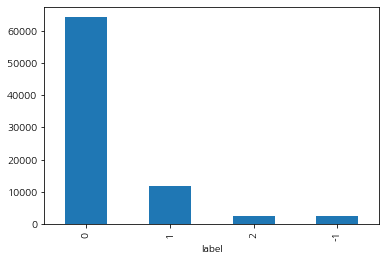

In [110]:
member_cpn.value_counts('label').plot(kind='bar')

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

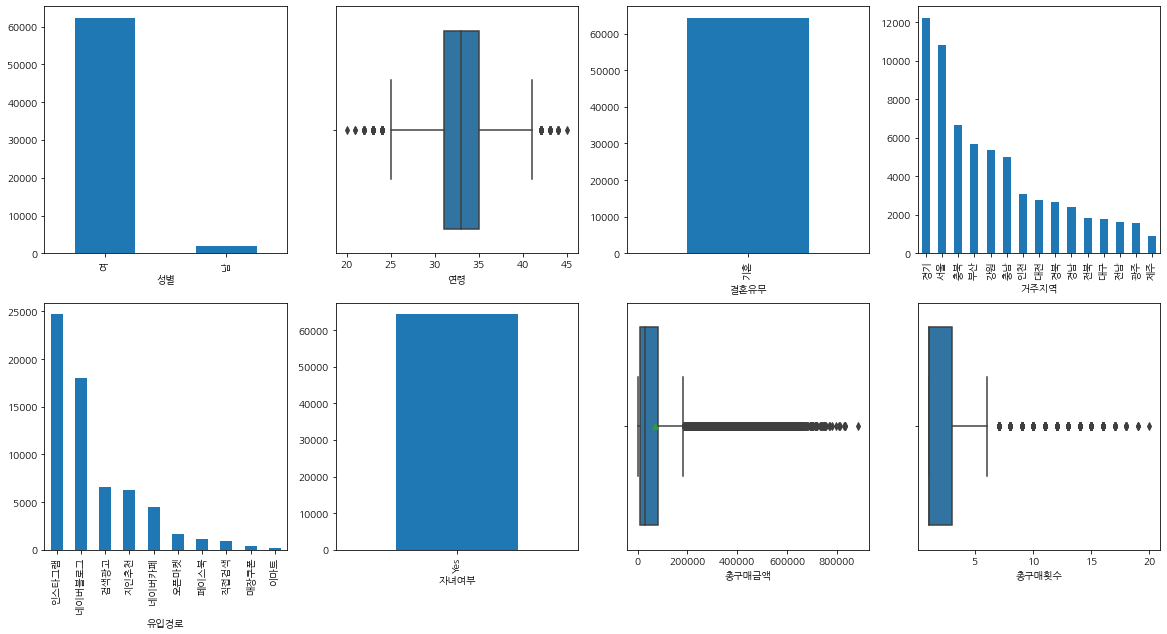

In [136]:
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
member_cpn_0.value_counts('성별').plot(kind='bar')

plt.subplot(2,4,2)
sns.boxplot(data=member_cpn_0, x='연령')

plt.subplot(2,4,3)
member_cpn_0.value_counts('결혼유무').plot(kind='bar')

plt.subplot(2,4,4)
member_cpn_0.value_counts('거주지역').plot(kind='bar')

plt.subplot(2,4,5)
member_cpn_0.value_counts('유입경로').plot(kind='bar')

plt.subplot(2,4,6)
member_cpn_0.value_counts('자녀여부').plot(kind='bar')

plt.subplot(2,4,7)
sns.boxplot(data=member_cpn_0, x='총구매금액',showmeans=True)
plt.subplot(2,4,8)
sns.boxplot(data=member_cpn_0, x='총구매횟수',showmeans=True)


plt.show()

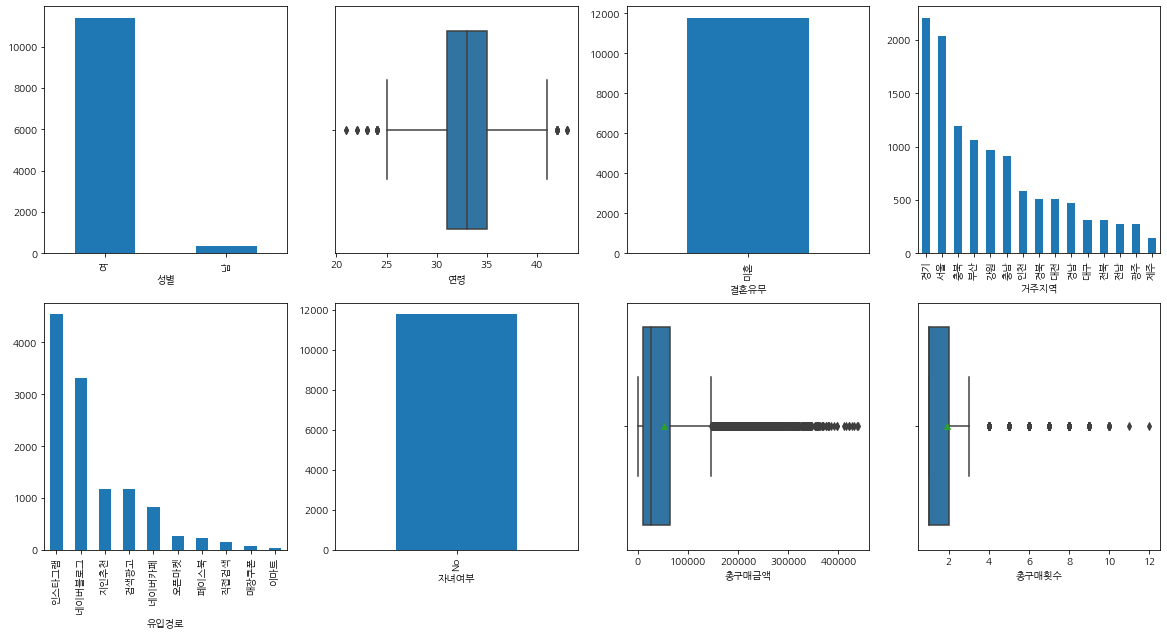

In [137]:
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
member_cpn_1.value_counts('성별').plot(kind='bar')

plt.subplot(2,4,2)
sns.boxplot(data=member_cpn_1, x='연령')

plt.subplot(2,4,3)
member_cpn_1.value_counts('결혼유무').plot(kind='bar')

plt.subplot(2,4,4)
member_cpn_1.value_counts('거주지역').plot(kind='bar')

plt.subplot(2,4,5)
member_cpn_1.value_counts('유입경로').plot(kind='bar')

plt.subplot(2,4,6)
member_cpn_1.value_counts('자녀여부').plot(kind='bar')

plt.subplot(2,4,7)
sns.boxplot(data=member_cpn_1, x='총구매금액',showmeans=True)
plt.subplot(2,4,8)
sns.boxplot(data=member_cpn_1, x='총구매횟수',showmeans=True)


plt.show()

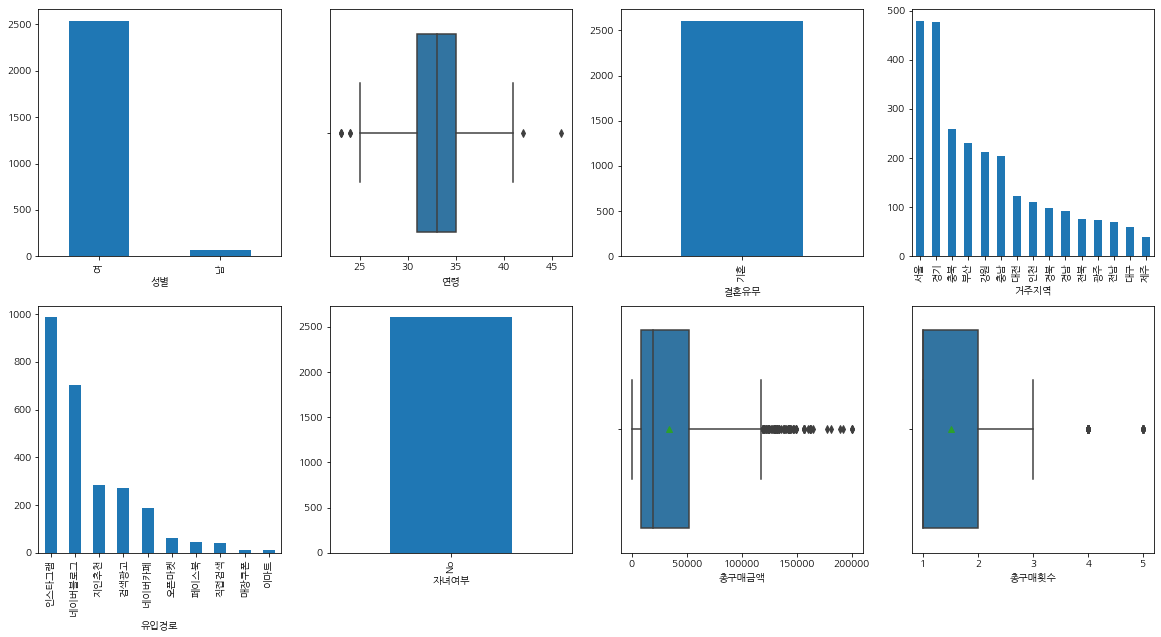

In [138]:
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
member_cpn_2.value_counts('성별').plot(kind='bar')

plt.subplot(2,4,2)
sns.boxplot(data=member_cpn_2, x='연령')

plt.subplot(2,4,3)
member_cpn_2.value_counts('결혼유무').plot(kind='bar')

plt.subplot(2,4,4)
member_cpn_2.value_counts('거주지역').plot(kind='bar')

plt.subplot(2,4,5)
member_cpn_2.value_counts('유입경로').plot(kind='bar')

plt.subplot(2,4,6)
member_cpn_2.value_counts('자녀여부').plot(kind='bar')

plt.subplot(2,4,7)
sns.boxplot(data=member_cpn_2, x='총구매금액',showmeans=True)
plt.subplot(2,4,8)
sns.boxplot(data=member_cpn_2, x='총구매횟수',showmeans=True)


plt.show()

# 이상치 제거

In [148]:
q =member_cpn_0[['총구매금액']].quantile([.25,.75])
q1 = q.iloc[0,0]
q2 = q.iloc[1,0]
i = q2-q1
i1 = q1 - 1.5*i
i2 = q2 + 1.5*i 
index = member_cpn_0[(member_cpn_0['총구매금액']>i1) & (member_cpn_0['총구매금액']<i2)].index
member_cpn_0_ideal = member_cpn_0.loc[index]

In [151]:
q =member_cpn_1[['총구매금액']].quantile([.25,.75])
q1 = q.iloc[0,0]
q2 = q.iloc[1,0]
i = q2-q1
i1 = q1 - 1.5*i
i2 = q2 + 1.5*i 
index = member_cpn_1[(member_cpn_1['총구매금액']>i1) & (member_cpn_1['총구매금액']<i2)].index
member_cpn_1_ideal = member_cpn_1.loc[index]

In [152]:
q =member_cpn_2[['총구매금액']].quantile([.25,.75])
q1 = q.iloc[0,0]
q2 = q.iloc[1,0]
i = q2-q1
i1 = q1 - 1.5*i
i2 = q2 + 1.5*i 
index = member_cpn_2[(member_cpn_2['총구매금액']>i1) & (member_cpn_2['총구매금액']<i2)].index
member_cpn_2_ideal = member_cpn_2.loc[index]

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


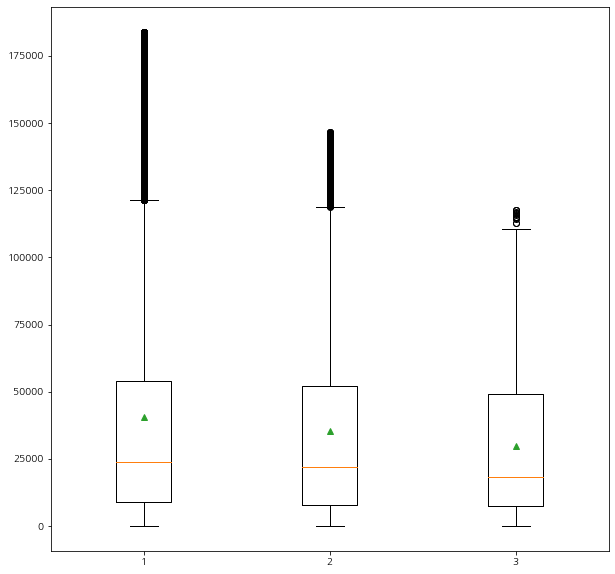

In [153]:
plt.figure(figsize=(10,10))

plt.boxplot([member_cpn_0_ideal['총구매금액'],member_cpn_1_ideal['총구매금액'],member_cpn_2_ideal['총구매금액']],showmeans=True)

plt.show()

In [ ]:
plt.figure(figsize=(10,10))

plt.boxplot([member_cpn_0['총구매금액'],member_cpn_1['총구매금액'],member_cpn_2['총구매금액']],showmeans=True)

plt.show()

# 모델링

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [182]:
test = sales_member_product.groupby(['고객번호','상품대분류_기저귀'],as_index=False)[['주문번호']].count()
id = test['고객번호'].unique()
id

array([201812310749735, 201812310749770, 201812310749771, ...,
       201912291058168, 201912291058169, 201912291058171])

In [191]:
c = test[test['고객번호']==201812310749735][['상품대분류_기저귀']]
c.iloc[0,0]

'5.0'

In [177]:
cat_df=pd.DataFrame()


[1, 2, 3, 4, 'a']

In [ ]:
cat_list=[]
for i in id:
    cat= test[test['고객번호']==i][['상품대분류_기저귀']].iloc[0,0]
    cat_list.append(cat)
cat_list

In [195]:
cat_df= cat_df.append(cat_list)
cat_df

,0
0,5.0
1,유아용품 외
2,3.0
3,3.0
4,3.0
...,...
81089,2.0
81090,4.0
81091,3.0
81092,4.0


In [197]:
member_cpn['상품대분류']=cat_df[0]

In [198]:
member_cpn.head()

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,총구매금액,총구매횟수,label,상품대분류
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,1,1,1,0.0,0.0,77000,2,0,5.0
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,1,1,1,1.0,1.0,5610,1,0,유아용품 외
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,1,1,1,2.0,2.0,119040,2,0,3.0
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,1,0,0,3.0,3.0,151920,2,1,3.0
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,1,1,1,4.0,4.0,27920,1,0,3.0


In [202]:
test_df = member_cpn[['성별_num','자녀여부_num','결혼유무_num','거주지역_num','유입경로_num','총구매금액','총구매횟수','label','상품대분류']]

In [203]:
test_df

,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,총구매금액,총구매횟수,label,상품대분류
0,1,1,1,0.0,0.0,77000,2,0,5.0
1,1,1,1,1.0,1.0,5610,1,0,유아용품 외
2,1,1,1,2.0,2.0,119040,2,0,3.0
3,1,0,0,3.0,3.0,151920,2,1,3.0
4,1,1,1,4.0,4.0,27920,1,0,3.0
...,...,...,...,...,...,...,...,...,...
81089,1,1,1,5.0,6.0,97800,2,0,2.0
81090,1,1,1,3.0,6.0,237000,3,0,4.0
81091,1,1,1,6.0,1.0,211940,4,0,3.0
81092,1,1,1,5.0,0.0,51000,1,0,4.0


In [205]:
x = test_df.drop(columns=['상품대분류'])
y = member_cpn['상품대분류']

In [206]:
x_tn, x_te, y_tn, y_te = train_test_split(x,y, test_size=0.2, random_state=1) # 학습시킬 데이터, 테스트용 데이터 설정


# 스케일링 하는 곳
std_scale = StandardScaler()
std_scale.fit(x_tn)
x_tn_std = std_scale.transform(x_tn)
x_te_std = std_scale.transform(x_te)

# 모델생성 randomforest로 만들어줌
clf_rf = RandomForestClassifier(max_depth=19, random_state=0) 
clf_rf.fit(x_tn_std,y_tn)

RandomForestClassifier(max_depth=19, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis =0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.bar(range(x_tn.shape[1]), importances[indices], color='r', yerr=std[indices])
plt.xticks(range(x_tn.shape[1]), x_tn.columns[indices], rotation=45)
plt.show()

In [208]:
pred_rf = clf_rf.predict(x_te_std)
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.5128552931746717
